In [1]:
%matplotlib inline

In [2]:
import numpy as np
import pandas as pd
import scipy.stats as stats

In [3]:
import matplotlib.pyplot as plt

In [4]:
import sklearn

In [5]:
import statsmodels.api as sm

In [6]:
import seaborn as sns
sns.set_style("whitegrid")
sns.set_context("poster")

In [7]:
from matplotlib import rcParams

In [8]:
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix

In [9]:
def cv_optimize(clf, parameters, X, y, n_jobs=1, n_folds=5, score_func=None):
    if score_func:
        gs = GridSearchCV(clf, param_grid=parameters, cv=n_folds, n_jobs=n_jobs, scoring=score_func)
    else:
        gs = GridSearchCV(clf, param_grid=parameters, n_jobs=n_jobs, cv=n_folds)
    gs.fit(X, y)
    print ("BEST", gs.best_params_, gs.best_score_, gs.cv_results_)
    best = gs.best_estimator_
    return best

In [10]:
def do_classify(clf, parameters, indf, featurenames, targetname, target1val, mask=None, reuse_split=None, score_func=None, n_folds=5, n_jobs=1):
    subdf=indf[featurenames]
    X=subdf.values
    y=(indf[targetname].values==target1val)*1
    if mask.all() !=None:
        print ("using mask")
        Xtrain, Xtest, ytrain, ytest = X[mask], X[~mask], y[mask], y[~mask]
    if reuse_split !=None:
        print ("using reuse split")
        Xtrain, Xtest, ytrain, ytest = reuse_split['Xtrain'], reuse_split['Xtest'], reuse_split['ytrain'], reuse_split['ytest']
    if parameters:
        clf = cv_optimize(clf, parameters, Xtrain, ytrain, n_jobs=n_jobs, n_folds=n_folds, score_func=score_func)
    clf=clf.fit(Xtrain, ytrain)
    training_accuracy = clf.score(Xtrain, ytrain)
    test_accuracy = clf.score(Xtest, ytest)
    print ("############# based on standard predict ################")
    print ("Accuracy on training data: %0.2f" % (training_accuracy))
    print ("Accuracy on test data:     %0.2f" % (test_accuracy))
    print (confusion_matrix(ytest, clf.predict(Xtest)))
    print ("########################################################")
    return clf, Xtrain, ytrain, Xtest, ytest

In [11]:
from matplotlib.colors import ListedColormap
cmap_light = ListedColormap(['#FFAAAA', '#AAAAFF'])
cmap_bold = ListedColormap(['#FF0000', '#00FF00', '#0000FF'])
cm = plt.cm.RdBu
cm_bright = ListedColormap(['#FF0000', '#0000FF'])

In [12]:
def plot_2tree(ax, Xtr, Xte, ytr, yte, clf, plot_train = True, plot_test = True, lab = ['Feature 1', 'Feature 2'], mesh=True, colorscale=cmap_light, cdiscrete=cmap_bold, alpha=0.3, psize=10, zfunc=False):
    plt.figure(figsize=(15,10))
    plot_step= 0.05
    xmin, xmax= Xtr[:,0].min(), Xtr[:,0].max()
    ymin, ymax= Xtr[:,1].min(), Xtr[:,1].max()
    xx, yy = np.meshgrid(np.arange(xmin, xmax, plot_step), np.arange(ymin, ymax, plot_step) )

    Xplot= np.c_[xx.ravel(), yy.ravel()]

    Z = clfTree1.predict( Xplot )

    Z= Z.reshape( xx.shape )
    cs = plt.contourf(xx, yy, Z, cmap= cmap_light, alpha=0.3)
  
    if (plot_train == True):
        plt.scatter(Xtr[:, 0], Xtr[:, 1], c=ytr-1, cmap=cmap_bold, alpha=alpha,edgecolor="k") 
    if (plot_test == True):
        plt.scatter(Xte[:, 0], Xte[:, 1], c=yte-1, cmap=cmap_bold, alpha=alpha, marker="s")

    plt.xlabel(lab[0])
    plt.ylabel(lab[1])
    plt.title("Boundary for decision tree classifier",fontsize=7.5)


In [13]:
df = pd.read_csv('winequality-red.csv', sep=';')
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [14]:
df.shape

(1599, 12)

In [15]:
df.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


(array([ 10.,   0.,  53.,   0., 681.,   0., 638.,   0., 199.,  18.]),
 array([3. , 3.5, 4. , 4.5, 5. , 5.5, 6. , 6.5, 7. , 7.5, 8. ]),
 <a list of 10 Patch objects>)

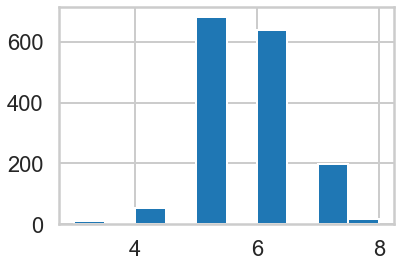

In [16]:
plt.hist(df.quality)

In [17]:
Y = df['quality'].values
df_tmp = df.drop('quality',1)
Y = np.array([1 if y>=7 else 0 for y in Y])
X = df_tmp.as_matrix()

df['target'] = (df['quality'].values >=7)*1

c:\python\lib\site-packages\ipykernel_launcher.py:4: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  after removing the cwd from sys.path.


In [18]:
Xnames = list(df.columns.values[1:11])

In [19]:
np.mean(df['target'])

0.1357098186366479

In [20]:
itrain, itest = train_test_split(range(df.shape[0]), train_size=0.6)
mask=np.ones(df.shape[0], dtype='int')
mask[itrain]=1
mask[itest]=0
mask = (mask==1)

In [21]:
print ("% Good wines in Training:", np.mean(df.target[mask]))
print ("% Good wines in Testing:", np.mean(df.target[~mask]))

% Good wines in Training: 0.13660062565172054
% Good wines in Testing: 0.134375


In [22]:
from sklearn import tree
clfTree1 = tree.DecisionTreeClassifier()

parameters = {"max_depth": [1, 2, 3, 4, 5, 6, 7], 'min_samples_leaf': [1, 2, 3, 4, 5, 6]}
clfTree1, Xtrain, ytrain, Xtest, ytest = do_classify(clfTree1, parameters, df, 
                                                     ['alcohol', 'fixed acidity'],'target', 1, 
                                                     mask=mask, n_jobs = 4, score_func = 'f1')

using mask
BEST {'max_depth': 4, 'min_samples_leaf': 6} 0.39501137793153795 {'mean_fit_time': array([0.00099754, 0.0007987 , 0.00099659, 0.0003993 , 0.00079808,
       0.00079842, 0.00079689, 0.00059929, 0.00059714, 0.00079803,
       0.000598  , 0.00039945, 0.0009974 , 0.00099645, 0.00059805,
       0.00059848, 0.0003994 , 0.00079808, 0.00079694, 0.00079803,
       0.00059814, 0.00059786, 0.00039778, 0.00059853, 0.00079832,
       0.00099616, 0.00099812, 0.00099587, 0.00079794, 0.00079913,
       0.00079832, 0.00079775, 0.00079789, 0.00099735, 0.00099936,
       0.00059934, 0.00079775, 0.00079789, 0.00099697, 0.0009973 ,
       0.00079603, 0.00099788]), 'std_fit_time': array([1.33173371e-06, 3.99352159e-04, 3.62835167e-06, 4.89045417e-04,
       3.99042611e-04, 3.99209806e-04, 3.98446242e-04, 4.89318773e-04,
       4.87592694e-04, 3.99017989e-04, 4.88266777e-04, 4.89220740e-04,
       5.13569337e-07, 2.81939421e-06, 4.88305431e-04, 4.88655903e-04,
       4.89162218e-04, 3.99041300e-04

c:\python\lib\site-packages\sklearn\model_selection\_search.py:813: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


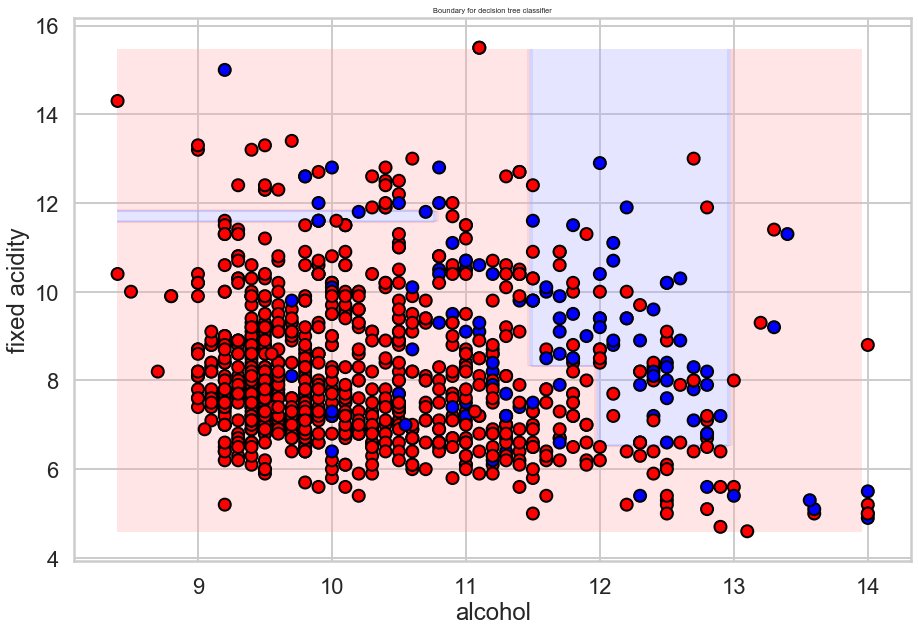

In [23]:
plot_2tree(plt, Xtrain, Xtest, ytrain, ytest, clfTree1, 
           lab = ['alcohol', 'fixed acidity'], alpha = 1, plot_test = False)

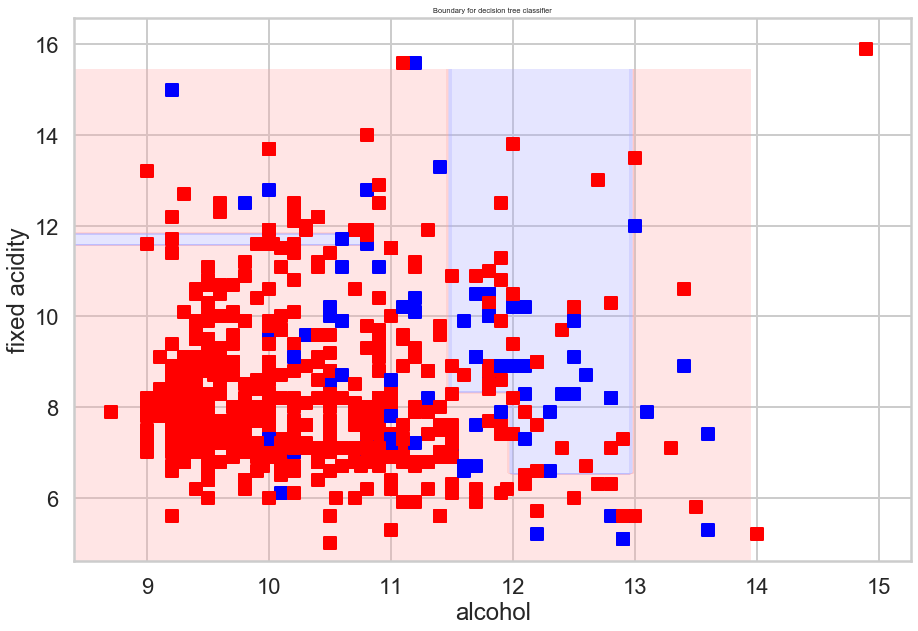

In [24]:
plot_2tree(plt, Xtrain, Xtest, ytrain, ytest, clfTree1, 
           lab = ['alcohol', 'fixed acidity'], alpha = 1, plot_train = False)

using mask
BEST {'max_depth': None, 'min_samples_leaf': 4} 0.28444390969938416 {'mean_fit_time': array([0.00099645, 0.00099716, 0.00039902]), 'std_fit_time': array([2.43887174e-06, 1.45102730e-06, 4.88694526e-04]), 'mean_score_time': array([0.00099735, 0.00119667, 0.0007978 ]), 'std_score_time': array([0.00063052, 0.00039814, 0.0003989 ]), 'param_max_depth': masked_array(data=[None, None, None],
             mask=[False, False, False],
       fill_value='?',
            dtype=object), 'param_min_samples_leaf': masked_array(data=[4, 5, 6],
             mask=[False, False, False],
       fill_value='?',
            dtype=object), 'params': [{'max_depth': None, 'min_samples_leaf': 4}, {'max_depth': None, 'min_samples_leaf': 5}, {'max_depth': None, 'min_samples_leaf': 6}], 'split0_test_score': array([0.27777778, 0.125     , 0.13333333]), 'split1_test_score': array([0.34375   , 0.33962264, 0.45901639]), 'split2_test_score': array([0.24      , 0.34615385, 0.34615385]), 'split3_test_score': a

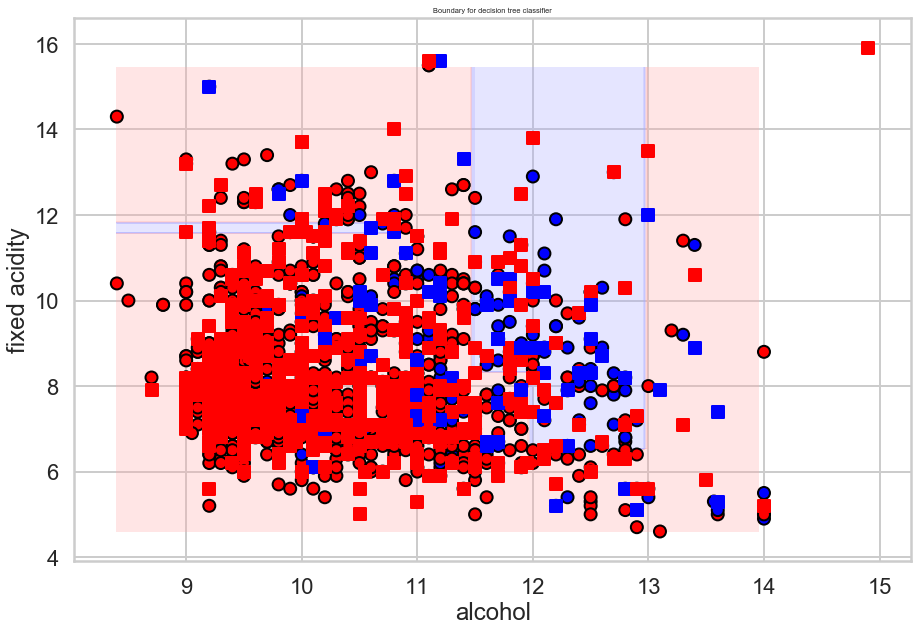

In [25]:
from sklearn import tree
clfTree_temp = tree.DecisionTreeClassifier()

parameters = {"max_depth": [None], 'min_samples_leaf': [4, 5, 6]}
clfTree_temp, Xtrain, ytrain, Xtest, ytest = do_classify(clfTree_temp, parameters, df, 
                                                     ['alcohol', 'fixed acidity'],'target', 1, 
                                                     mask=mask, n_jobs = 4, score_func = 'f1')
plot_2tree(plt, Xtrain, Xtest, ytrain, ytest, clfTree_temp, 
           lab = ['alcohol', 'fixed acidity'], alpha = 1, plot_train = True)

In [26]:
clfTree2 = tree.DecisionTreeClassifier()

parameters = {"max_depth": [1, 2, 3, 4, 5, 6, 7], 'min_samples_leaf': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]}
clfTree2, Xtrain, ytrain, Xtest, ytest = do_classify(clfTree2, parameters, df, 
                                                     Xnames,'target', 1, 
                                                     mask=mask, n_jobs = 4, score_func = 'f1')

using mask
BEST {'max_depth': 4, 'min_samples_leaf': 9} 0.47046252492975 {'mean_fit_time': array([0.00139761, 0.00080643, 0.00098586, 0.00119028, 0.00079708,
       0.00099292, 0.00119615, 0.00099726, 0.0011971 , 0.00080042,
       0.00139456, 0.00139432, 0.00139637, 0.00139589, 0.00160074,
       0.00159612, 0.00139709, 0.00180416, 0.00139623, 0.00179534,
       0.00200062, 0.00219436, 0.00199428, 0.00179133, 0.00179491,
       0.00199423, 0.00178971, 0.00159593, 0.00159588, 0.0017951 ,
       0.00259318, 0.00239444, 0.00259337, 0.00200057, 0.00179482,
       0.00280528, 0.00218787, 0.00219402, 0.00259299, 0.00200071,
       0.00318561, 0.00338283, 0.00298533, 0.00279288, 0.0023931 ,
       0.00299201, 0.00279264, 0.00319734, 0.00278692, 0.00219359,
       0.00259323, 0.00259891, 0.00258684, 0.00359578, 0.00259953,
       0.00238729, 0.00219369, 0.0021944 , 0.0021944 , 0.00279317,
       0.00279298, 0.00279231, 0.00280399, 0.00299163, 0.00318575,
       0.00299678, 0.0033915 , 0.00278

c:\python\lib\site-packages\sklearn\model_selection\_search.py:813: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


In [27]:
from sklearn.ensemble import RandomForestClassifier

clfForest = RandomForestClassifier()

parameters = {"n_estimators": range(1, 20)}
clfForest, Xtrain, ytrain, Xtest, ytest = do_classify(clfForest, parameters, 
                                                       df, Xnames, 'target', 1, mask=mask, 
                                                       n_jobs = 4, score_func='f1')


using mask
BEST {'n_estimators': 3} 0.43893098053422036 {'mean_fit_time': array([0.00299196, 0.00399122, 0.00418863, 0.00658221, 0.0083776 ,
       0.0093739 , 0.00997281, 0.01077094, 0.01356368, 0.01476007,
       0.01615686, 0.0169601 , 0.01834559, 0.01955328, 0.02353706,
       0.02374372, 0.02453423, 0.0287313 , 0.0259316 ]), 'std_fit_time': array([0.00063045, 0.00166813, 0.00039883, 0.00119728, 0.00173924,
       0.00149172, 0.00089346, 0.00074614, 0.00149272, 0.00171505,
       0.00263183, 0.00178763, 0.00331708, 0.00173682, 0.00337326,
       0.00293151, 0.00411697, 0.00214436, 0.00140082]), 'mean_score_time': array([0.00179558, 0.00119634, 0.00099764, 0.00139599, 0.00159588,
       0.00139723, 0.00179586, 0.00179539, 0.00199499, 0.00179534,
       0.00139608, 0.00239358, 0.00219398, 0.0019886 , 0.00259309,
       0.00279126, 0.00279279, 0.00259204, 0.00299206]), 'std_score_time': array([3.99137608e-04, 3.99279058e-04, 2.86102295e-07, 4.88675096e-04,
       4.88733398e-04, 4.892

c:\python\lib\site-packages\sklearn\model_selection\_search.py:813: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


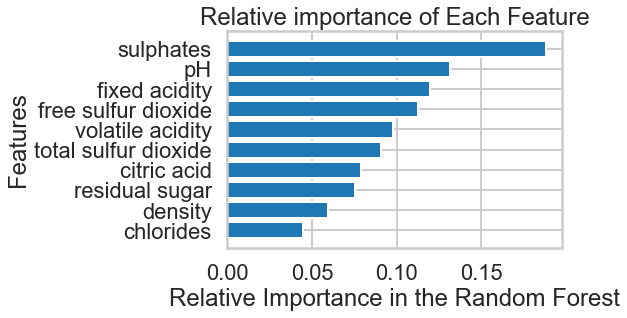

In [28]:
importance_list = clfForest.feature_importances_
name_list = df.columns
importance_list, name_list = zip(*sorted(zip(importance_list, name_list)))
plt.barh(range(len(name_list)),importance_list,align='center')
plt.yticks(range(len(name_list)),name_list)
plt.xlabel('Relative Importance in the Random Forest')
plt.ylabel('Features')
plt.title('Relative importance of Each Feature')
plt.show()

In [29]:
from sklearn.ensemble import AdaBoostClassifier

clfAda = AdaBoostClassifier()

parameters = {"n_estimators": range(10, 60)}
clfAda, Xtrain, ytrain, Xtest, ytest = do_classify(clfAda, parameters, 
                                                       df, Xnames, 'target', 1, mask=mask, 
                                                       n_jobs = 4, score_func='f1')

using mask


c:\python\lib\site-packages\sklearn\model_selection\_search.py:813: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


BEST {'n_estimators': 52} 0.4246379211912821 {'mean_fit_time': array([0.02174153, 0.0223351 , 0.02353554, 0.01894913, 0.02692742,
       0.02313251, 0.02552838, 0.02753072, 0.02632885, 0.03170972,
       0.02732716, 0.03031907, 0.04388247, 0.03671317, 0.04407983,
       0.04448624, 0.05006676, 0.04707375, 0.050664  , 0.04887047,
       0.04687591, 0.0482656 , 0.06243281, 0.05983825, 0.06442666,
       0.06702113, 0.07319832, 0.07182217, 0.0754004 , 0.07680044,
       0.075597  , 0.078584  , 0.08577046, 0.0849771 , 0.08936014,
       0.08217931, 0.09374833, 0.09354706, 0.09913492, 0.09773817,
       0.09973397, 0.10452065, 0.10571504, 0.10033045, 0.10272493,
       0.10850797, 0.10591335, 0.10711279, 0.1071095 , 0.09832845]), 'std_fit_time': array([9.77019109e-04, 3.12893533e-03, 2.72023102e-03, 1.83254420e-05,
       3.78412914e-03, 3.52710391e-03, 3.48465819e-03, 3.07837295e-03,
       3.81481662e-03, 3.59999647e-03, 4.89025685e-04, 7.98118287e-04,
       3.51108766e-03, 6.03129105e-0

In [30]:
from sklearn.ensemble import GradientBoostingClassifier

clfGB = GradientBoostingClassifier()

parameters = {"n_estimators": range(30, 60), "max_depth": [1, 2, 3, 4, 5]}
clfGB, Xtrain, ytrain, Xtest, ytest = do_classify(clfGB, parameters, 
                                                       df, Xnames, 'target', 1, mask=mask, 
                                                       n_jobs = 4, score_func='f1')

using mask


c:\python\lib\site-packages\sklearn\model_selection\_search.py:813: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


BEST {'max_depth': 4, 'n_estimators': 50} 0.4603551917103171 {'mean_fit_time': array([0.01675482, 0.0197464 , 0.0191484 , 0.01994667, 0.01954803,
       0.0205452 , 0.02014604, 0.02374077, 0.02233934, 0.01934414,
       0.02553229, 0.0219418 , 0.01894798, 0.01795197, 0.01695452,
       0.01874976, 0.01795197, 0.01835093, 0.02014627, 0.01994653,
       0.02892318, 0.02174163, 0.01994643, 0.0317131 , 0.03311248,
       0.03132243, 0.03251276, 0.0317152 , 0.0351007 , 0.03191347,
       0.02852268, 0.02613096, 0.02673321, 0.03131995, 0.02972155,
       0.02892294, 0.02912273, 0.03370404, 0.03331132, 0.03311105,
       0.03371053, 0.03650455, 0.03510613, 0.03570352, 0.0363039 ,
       0.0398932 , 0.0390954 , 0.03889685, 0.03431387, 0.04248967,
       0.03011928, 0.04109015, 0.0420877 , 0.03769908, 0.0420815 ,
       0.03490601, 0.04447932, 0.04228702, 0.04487972, 0.04747329,
       0.03949833, 0.03630304, 0.03710575, 0.03869748, 0.04349275,
       0.04268494, 0.04767179, 0.0470736 , 0.05086

In [31]:
from sklearn.tree import DecisionTreeClassifier
import sklearn.linear_model
import sklearn.svm

def plot_decision_surface(clf, X_train, Y_train):
    plot_step=0.1
    
    if X_train.shape[1] != 2:
        raise ValueError("X_train should have exactly 2 columnns!")
    
    x_min, x_max = X_train[:, 0].min() - plot_step, X_train[:, 0].max() + plot_step
    y_min, y_max = X_train[:, 1].min() - plot_step, X_train[:, 1].max() + plot_step
    xx, yy = np.meshgrid(np.arange(x_min, x_max, plot_step),
                         np.arange(y_min, y_max, plot_step))

    clf.fit(X_train,Y_train)
    if hasattr(clf, 'predict_proba'):
        Z = clf.predict_proba(np.c_[xx.ravel(), yy.ravel()])[:,1]
    else:
        Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])    
    Z = Z.reshape(xx.shape)
    cs = plt.contourf(xx, yy, Z, cmap=plt.cm.Reds)
    plt.scatter(X_train[:,0],X_train[:,1],c=Y_train,cmap=plt.cm.Paired)
    plt.show()
    
imp_cols = clfForest.feature_importances_.argsort()[::-1][0:2]

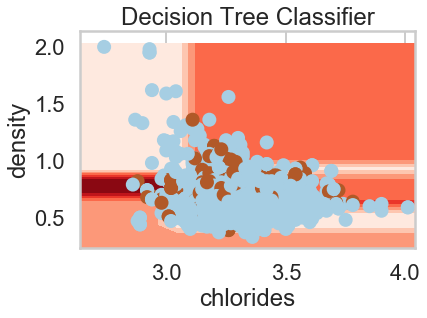

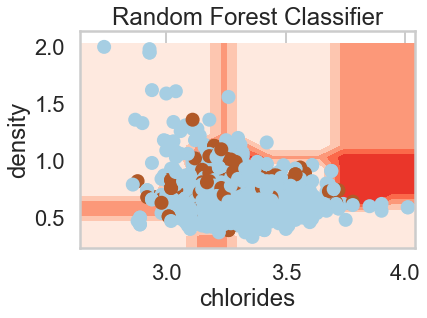

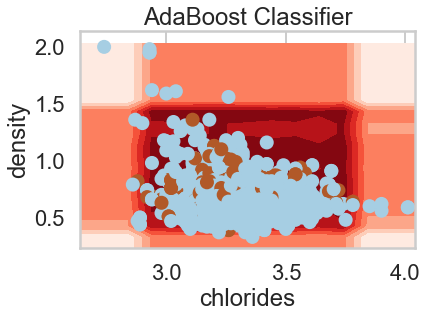

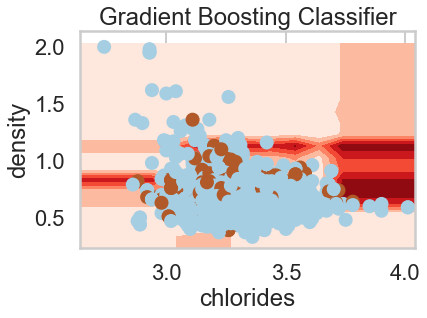

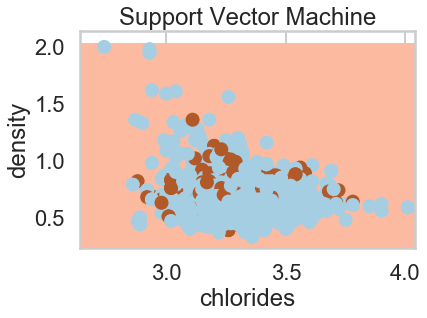

In [32]:
X_imp = df[['pH', 'sulphates']].values

classifiers = [clfTree2,
               clfForest,
               clfAda,
               clfGB,
               sklearn.svm.SVC(C=100.0, gamma=1.0)]

titleClassifer = ['Decision Tree Classifier', 'Random Forest Classifier', 
                  'AdaBoost Classifier', 'Gradient Boosting Classifier', 'Support Vector Machine']
for c in range(5):
    plt.title(titleClassifer[c])
    plt.xlabel(name_list[0])
    plt.ylabel(name_list[1])
    plot_decision_surface(classifiers[c], X_imp, df.target.values)

In [33]:
df.target

0       0
1       0
2       0
3       0
4       0
       ..
1594    0
1595    0
1596    0
1597    0
1598    0
Name: target, Length: 1599, dtype: int32